In [2]:
import pandas as pd

# Load the CSV files
path_distances = open('./Results_Experiments/File_Paths/path_distances.txt','r').read()
for i in range(0,5,2):
    path = f'../{path_distances}/results_customer_profile_{i}_and_customer_profile_{i+1}.csv'
    globals()[f'df_{i}'] = pd.read_csv(path)
display(df_0)
display(df_2)
display(df_4)

,Cluster,Total_distance,Connections_diff,Weight_diff,Unit_diff
0,9,-0.967140,0.073684,0.893456,0.0
1,5,-0.893067,0.155172,1.048239,0.0
2,3,-0.872540,1.234234,0.361694,0.0
3,2,-0.578497,0.448598,0.129899,0.0
4,8,-0.535846,0.452830,0.988676,0.0
5,6,-0.085829,0.222222,0.308051,0.0
6,4,0.103770,0.078652,0.182422,0.0
7,0,0.420583,0.873786,0.453203,0.0
8,1,1.062096,1.360656,0.298559,0.0
9,7,1.532714,1.207317,0.325397,0.0


,Cluster,Total_distance,Connections_diff,Weight_diff,Unit_diff
0,6,-4.127145,1.649351,2.477794,0.0
1,8,-2.842212,0.177215,2.664997,0.0
2,1,-2.744683,2.446809,0.297874,0.0
3,3,-1.392070,1.769231,0.377161,0.0
4,5,-0.911269,0.348485,1.259754,0.0
5,9,-0.856426,0.020619,0.835808,0.0
6,7,0.539957,0.077922,0.462034,0.0
7,0,0.656627,1.915888,1.259260,0.0
8,4,1.306681,1.719512,0.412832,0.0
9,2,1.401385,0.950413,0.450972,0.0


,Cluster,Total_distance,Connections_diff,Weight_diff,Unit_diff
0,6,-2.333437,1.372340,0.961097,0.0
1,4,-1.519836,1.531646,0.011810,0.0
2,1,-1.128705,0.217949,0.910756,0.0
3,5,-0.915516,0.625000,0.290516,0.0
4,0,-0.702800,0.248000,0.454800,0.0
5,8,-0.640422,0.644444,0.004023,0.0
6,9,0.208941,0.080357,0.128584,0.0
7,3,0.622114,0.345324,0.967438,0.0
8,7,0.853157,0.506849,1.360006,0.0
9,2,0.998462,0.809091,1.807553,0.0


In [3]:
import numpy as np
# Concatenate the dataframes
df_combined = pd.concat([df_0, df_2, df_4], ignore_index=True)

display(df_combined)

std_con = np.std(df_combined["Connections_diff"]).round(2)
std_wei = np.std(df_combined["Weight_diff"]).round(2)
std_uni = np.std(df_combined["Unit_diff"]).round(2)

deviations = pd.DataFrame({
  "Attribute": ["Connection", "Weight", "UnitType"],
  "Standard_Deviation": [std_con,std_wei,std_uni]
})

deviations.sort_values(by='Standard_Deviation')
display(deviations)

path_shift_explanations = open('./Results_Experiments/File_Paths/path_shift_explanations.txt','r').read()
output_path = f"../{path_shift_explanations}/Calculated_Variances.csv"
deviations.to_csv(output_path, index=False)


,Cluster,Total_distance,Connections_diff,Weight_diff,Unit_diff
0,9,-0.967140,0.073684,0.893456,0.0
1,5,-0.893067,0.155172,1.048239,0.0
2,3,-0.872540,1.234234,0.361694,0.0
3,2,-0.578497,0.448598,0.129899,0.0
4,8,-0.535846,0.452830,0.988676,0.0
5,6,-0.085829,0.222222,0.308051,0.0
6,4,0.103770,0.078652,0.182422,0.0
7,0,0.420583,0.873786,0.453203,0.0
8,1,1.062096,1.360656,0.298559,0.0
9,7,1.532714,1.207317,0.325397,0.0


,Attribute,Standard_Deviation
0,Connection,0.67
1,Weight,0.66
2,UnitType,0.00


OSError: Cannot save file into a non-existent directory: '../Shift_Explanation/Results_Experiments/Test/Shift_Explanation/results_experiments/Variances'

In [ ]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df_combined[['Connections_diff', 'Weight_diff', 'Unit_diff']]
y = df_combined['Total_distance']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the regression results
model_summary = model.summary()

# Save the regression results to a text file
with open(f'../{path_distances}/regression_summary.txt', 'w') as f:
    f.write(model_summary.as_text())
    
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:         Total_distance   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1132.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           9.22e-27
Time:                        12:34:40   Log-Likelihood:                -48.645
No. Observations:                  30   AIC:                             103.3
Df Residuals:                      27   BIC:                             107.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6659      0.424  

/opt/miniconda3/envs/PAMI_Paper/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


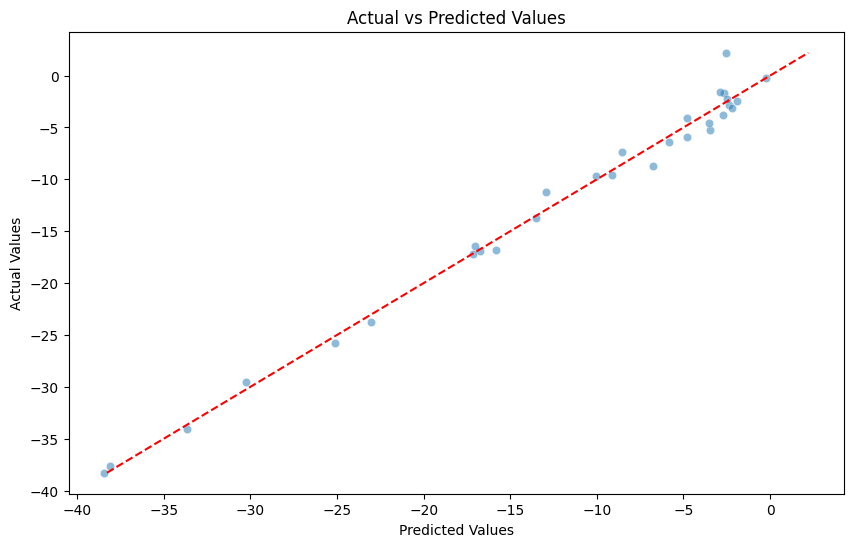

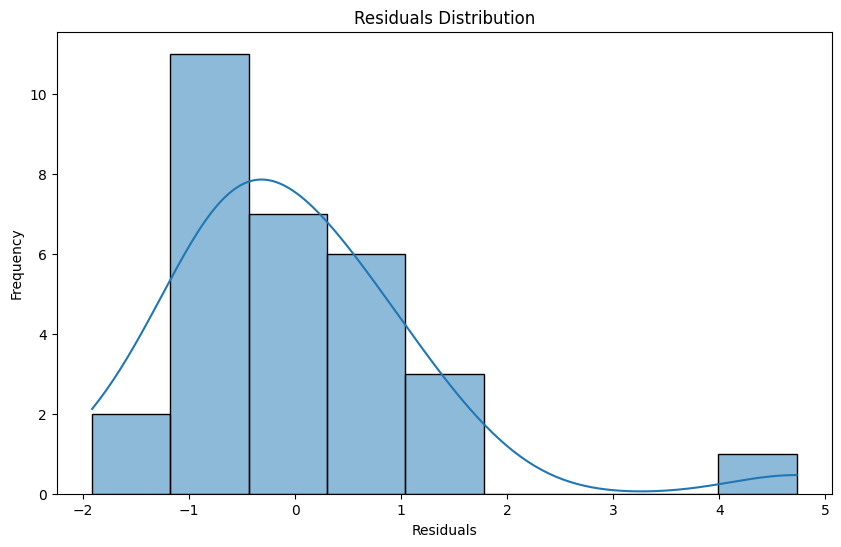

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
predictions = model.predict(X)
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=y, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Add a line for perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot Residuals
residuals = y - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()